In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import random
import tensorflow as tf
from tensorflow.keras.optimizers import Adam


df = pd.read_csv('Sleep_Efficiency.csv')
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [2]:
numerik_df = df.select_dtypes(include=[np.number])
display(numerik_df.head(10))

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
0,1,65,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0
1,2,69,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0
2,3,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0
3,4,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0
4,5,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0
5,6,36,7.5,0.90,23,60,17,0.0,NaN,0.0,1.0
6,7,27,6.0,0.54,28,25,47,2.0,50.0,0.0,1.0
7,8,53,10.0,0.90,28,52,20,0.0,50.0,0.0,3.0
8,9,41,6.0,0.79,28,55,17,3.0,50.0,0.0,1.0
9,10,11,9.0,0.55,18,37,45,4.0,0.0,0.0,0.0


In [3]:
print(f"Jumlah record (baris): {df.shape[0]}")
print(f"Jumlah attribute (kolom): {df.shape[1]}")
print(f"Nama attribute: {list(df.columns)}")
print(f"Jumlah attribute numerik: {len(numerik_df.columns)}")

Jumlah record (baris): 452
Jumlah attribute (kolom): 15
Nama attribute: ['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']
Jumlah attribute numerik: 11


In [4]:
kategori_df = df.select_dtypes(include=['object'])
for col in kategori_df.columns:
    print(f"{col} : {df[col].nunique()} label")

Gender : 2 label
Bedtime : 424 label
Wakeup time : 434 label
Smoking status : 2 label


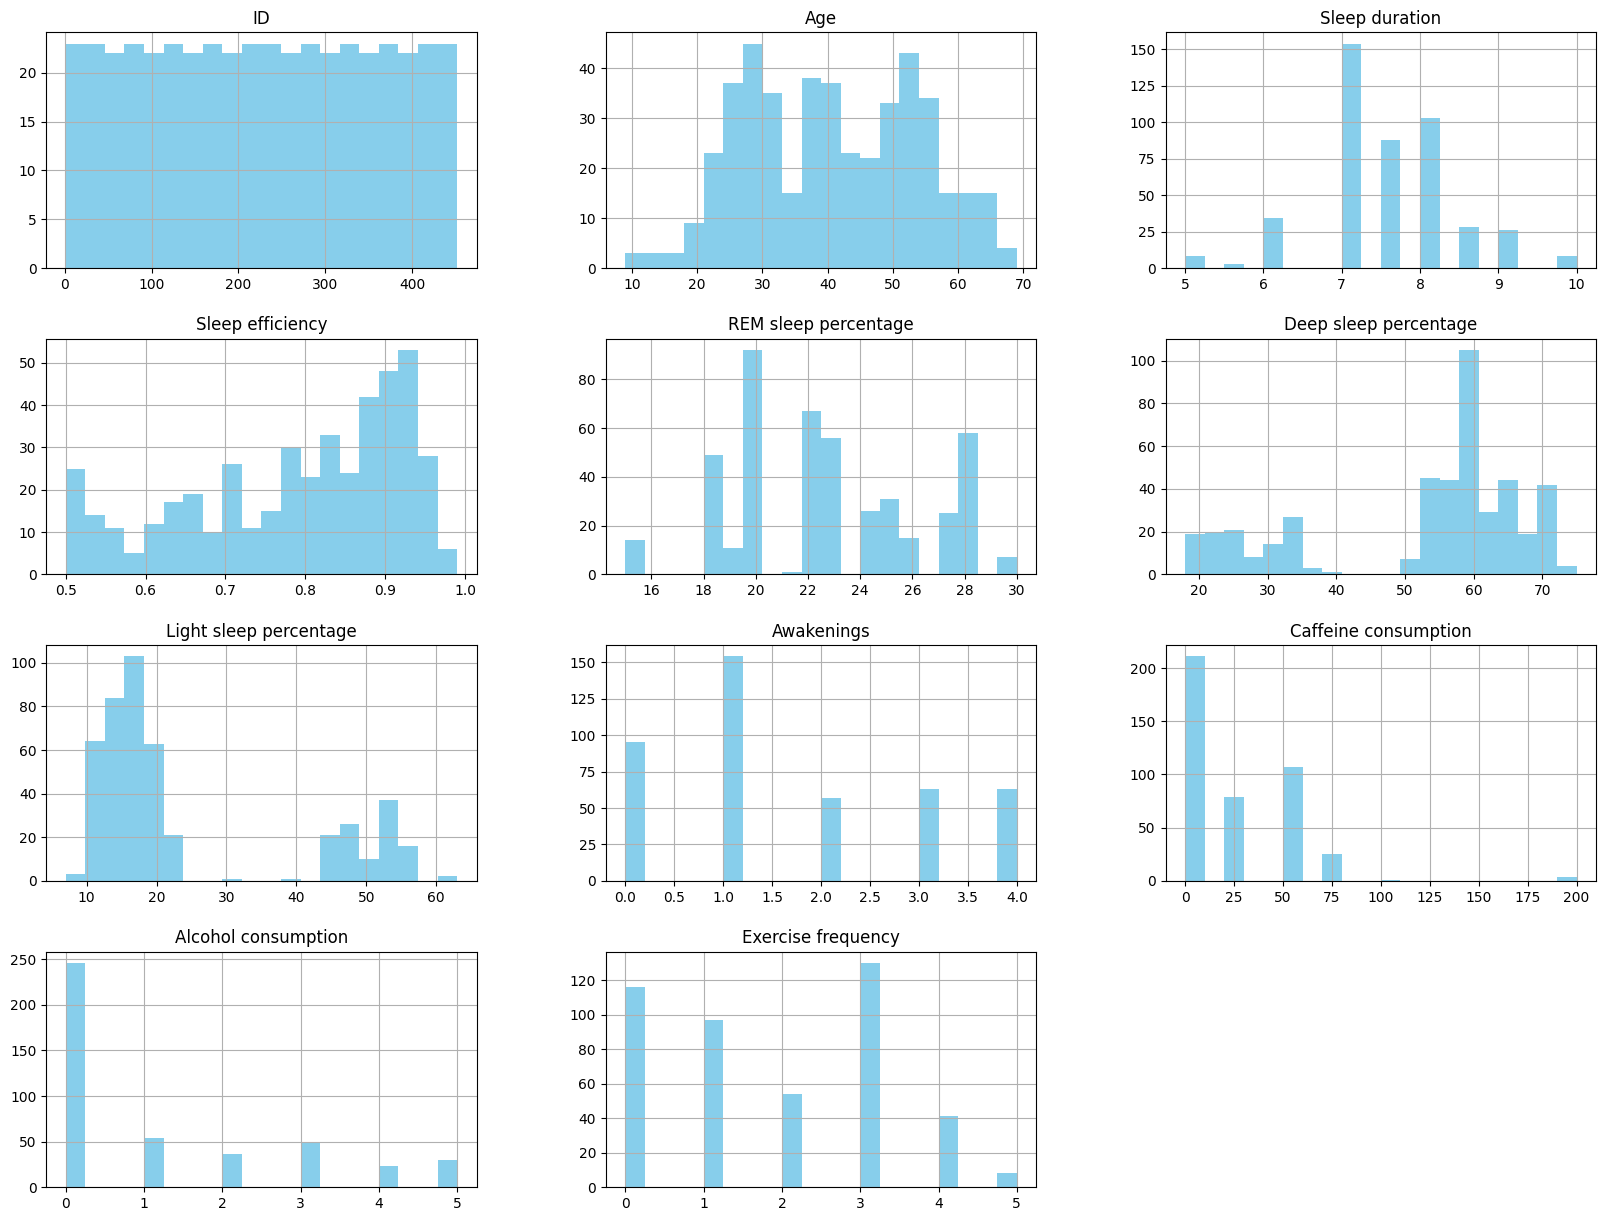

In [5]:
x = df.hist(bins=20, figsize=(20, 15), color='skyblue')
plt.show()

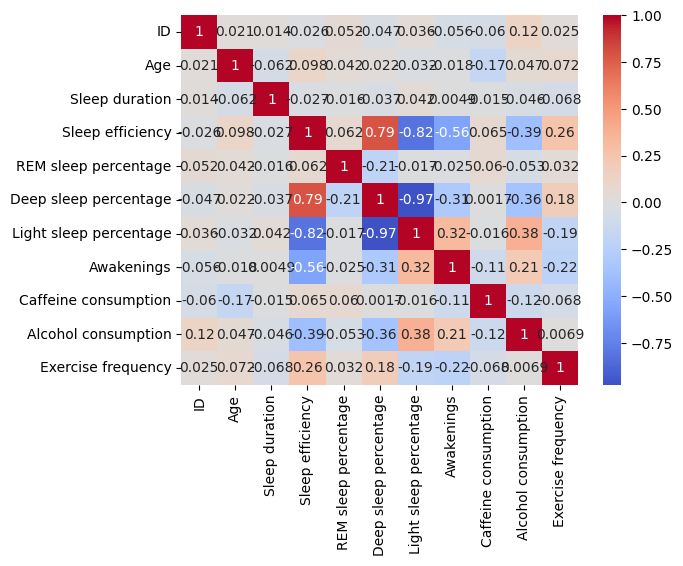

In [6]:
cor_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(cor_matrix, cmap='coolwarm', annot=True, center=0)
plt.show()

## Kesimpulan Analisis dan Visualisasi Data Sleep Efficiency

1. **Statistik Deskriptif**  
   - Dari perhitungan statistik (`mean`, `std`, `min`, `max`, Q1, Q2, Q3), rata-rata **durasi tidur** adalah sekitar 7–8 jam dengan efisiensi tidur rata-rata sekitar 79%.  
   - Nilai minimum dan maksimum menunjukkan adanya variasi besar, misalnya ada efisiensi tidur sangat rendah (50%) hingga sangat tinggi (99%).  

2. **Record Pertama Atribut Numerik**  
   - Dari 10 record pertama terlihat data numerik sudah sesuai dengan deskripsi statistik, misalnya durasi tidur sebagian besar di atas 6 jam.  
   - Data ini memberi gambaran awal bagaimana pola tidur tiap individu.

3. **Informasi Dataset**  
   - Dataset memiliki sejumlah record (baris) dan beberapa atribut (kolom).  
   - Dari informasi jumlah atribut, terlihat bahwa sebagian besar atribut bertipe numerik, sisanya bertipe kategorikal (object).  

4. **Jumlah Label Atribut Kategorikal**  
   - Atribut kategorikal seperti **Gender**, **Smoking status**, dan **Exercise frequency** memiliki jumlah kategori tertentu.  
   - Misalnya, Gender terdiri dari 2 label, Smoking status terdiri dari beberapa label, dan Exercise frequency memiliki beberapa kategori tingkat frekuensi olahraga.  

5. **Visualisasi Histogram**  
   - Histogram menunjukkan distribusi tiap atribut numerik.  
   - Sebagian besar orang memiliki durasi tidur 7–8 jam, efisiensi tidur sekitar 70–90%.  

6. **Heatmap Korelasi**  
   - Heatmap menunjukkan **Sleep Duration** berkorelasi positif dengan **Sleep Efficiency**, artinya semakin lama tidur maka cenderung semakin efisien.  
   - Sebaliknya, **Awakenings** berkorelasi negatif dengan **Sleep Efficiency**, artinya semakin sering terbangun maka efisiensi tidur menurun.  
   - Variabel gaya hidup seperti konsumsi kafein, alkohol, dan olahraga memiliki korelasi yang lemah terhadap efisiensi tidur.



Secara keseluruhan, kualitas tidur dalam dataset ini dipengaruhi terutama oleh **durasi tidur** dan **frekuensi terbangun**, sementara faktor gaya hidup lain memberikan pengaruh yang lebih lemah. Distribusi data juga menunjukkan bahwa mayoritas orang tidur cukup lama dengan efisiensi yang cukup baik.


------------------------------------------------------------ DATA CLEANING ------------------------------------------------------------

In [7]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

Mengecek jumlah missing value di setiap kolom untuk mengetahui apakah ada data yang hilang.

In [8]:
# Handling missing value
df = df.dropna(subset=['Awakenings'])
df = df.dropna(subset=['Caffeine consumption'])
df = df.dropna(subset=['Alcohol consumption'])
df = df.dropna(subset=['Exercise frequency'])
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

Menghapus baris yang memiliki missing value di kolom penting, agar model atau analisis tidak terganggu oleh data yang kosong, yang bisa menyebabkan error.

In [9]:
# Handling duplicate value
# Melihat jumlah duplicate value
duplicate = df.duplicated().sum()
print('Jumlah nilai duplikat pada data: ', duplicate)

Jumlah nilai duplikat pada data:  0


Mengecek jumlah record yang duplikat, karena bisa mempengaruhi distribusi data dan hasil analisis, sehingga perlu diidentifikasi dan dihapus bila perlu.

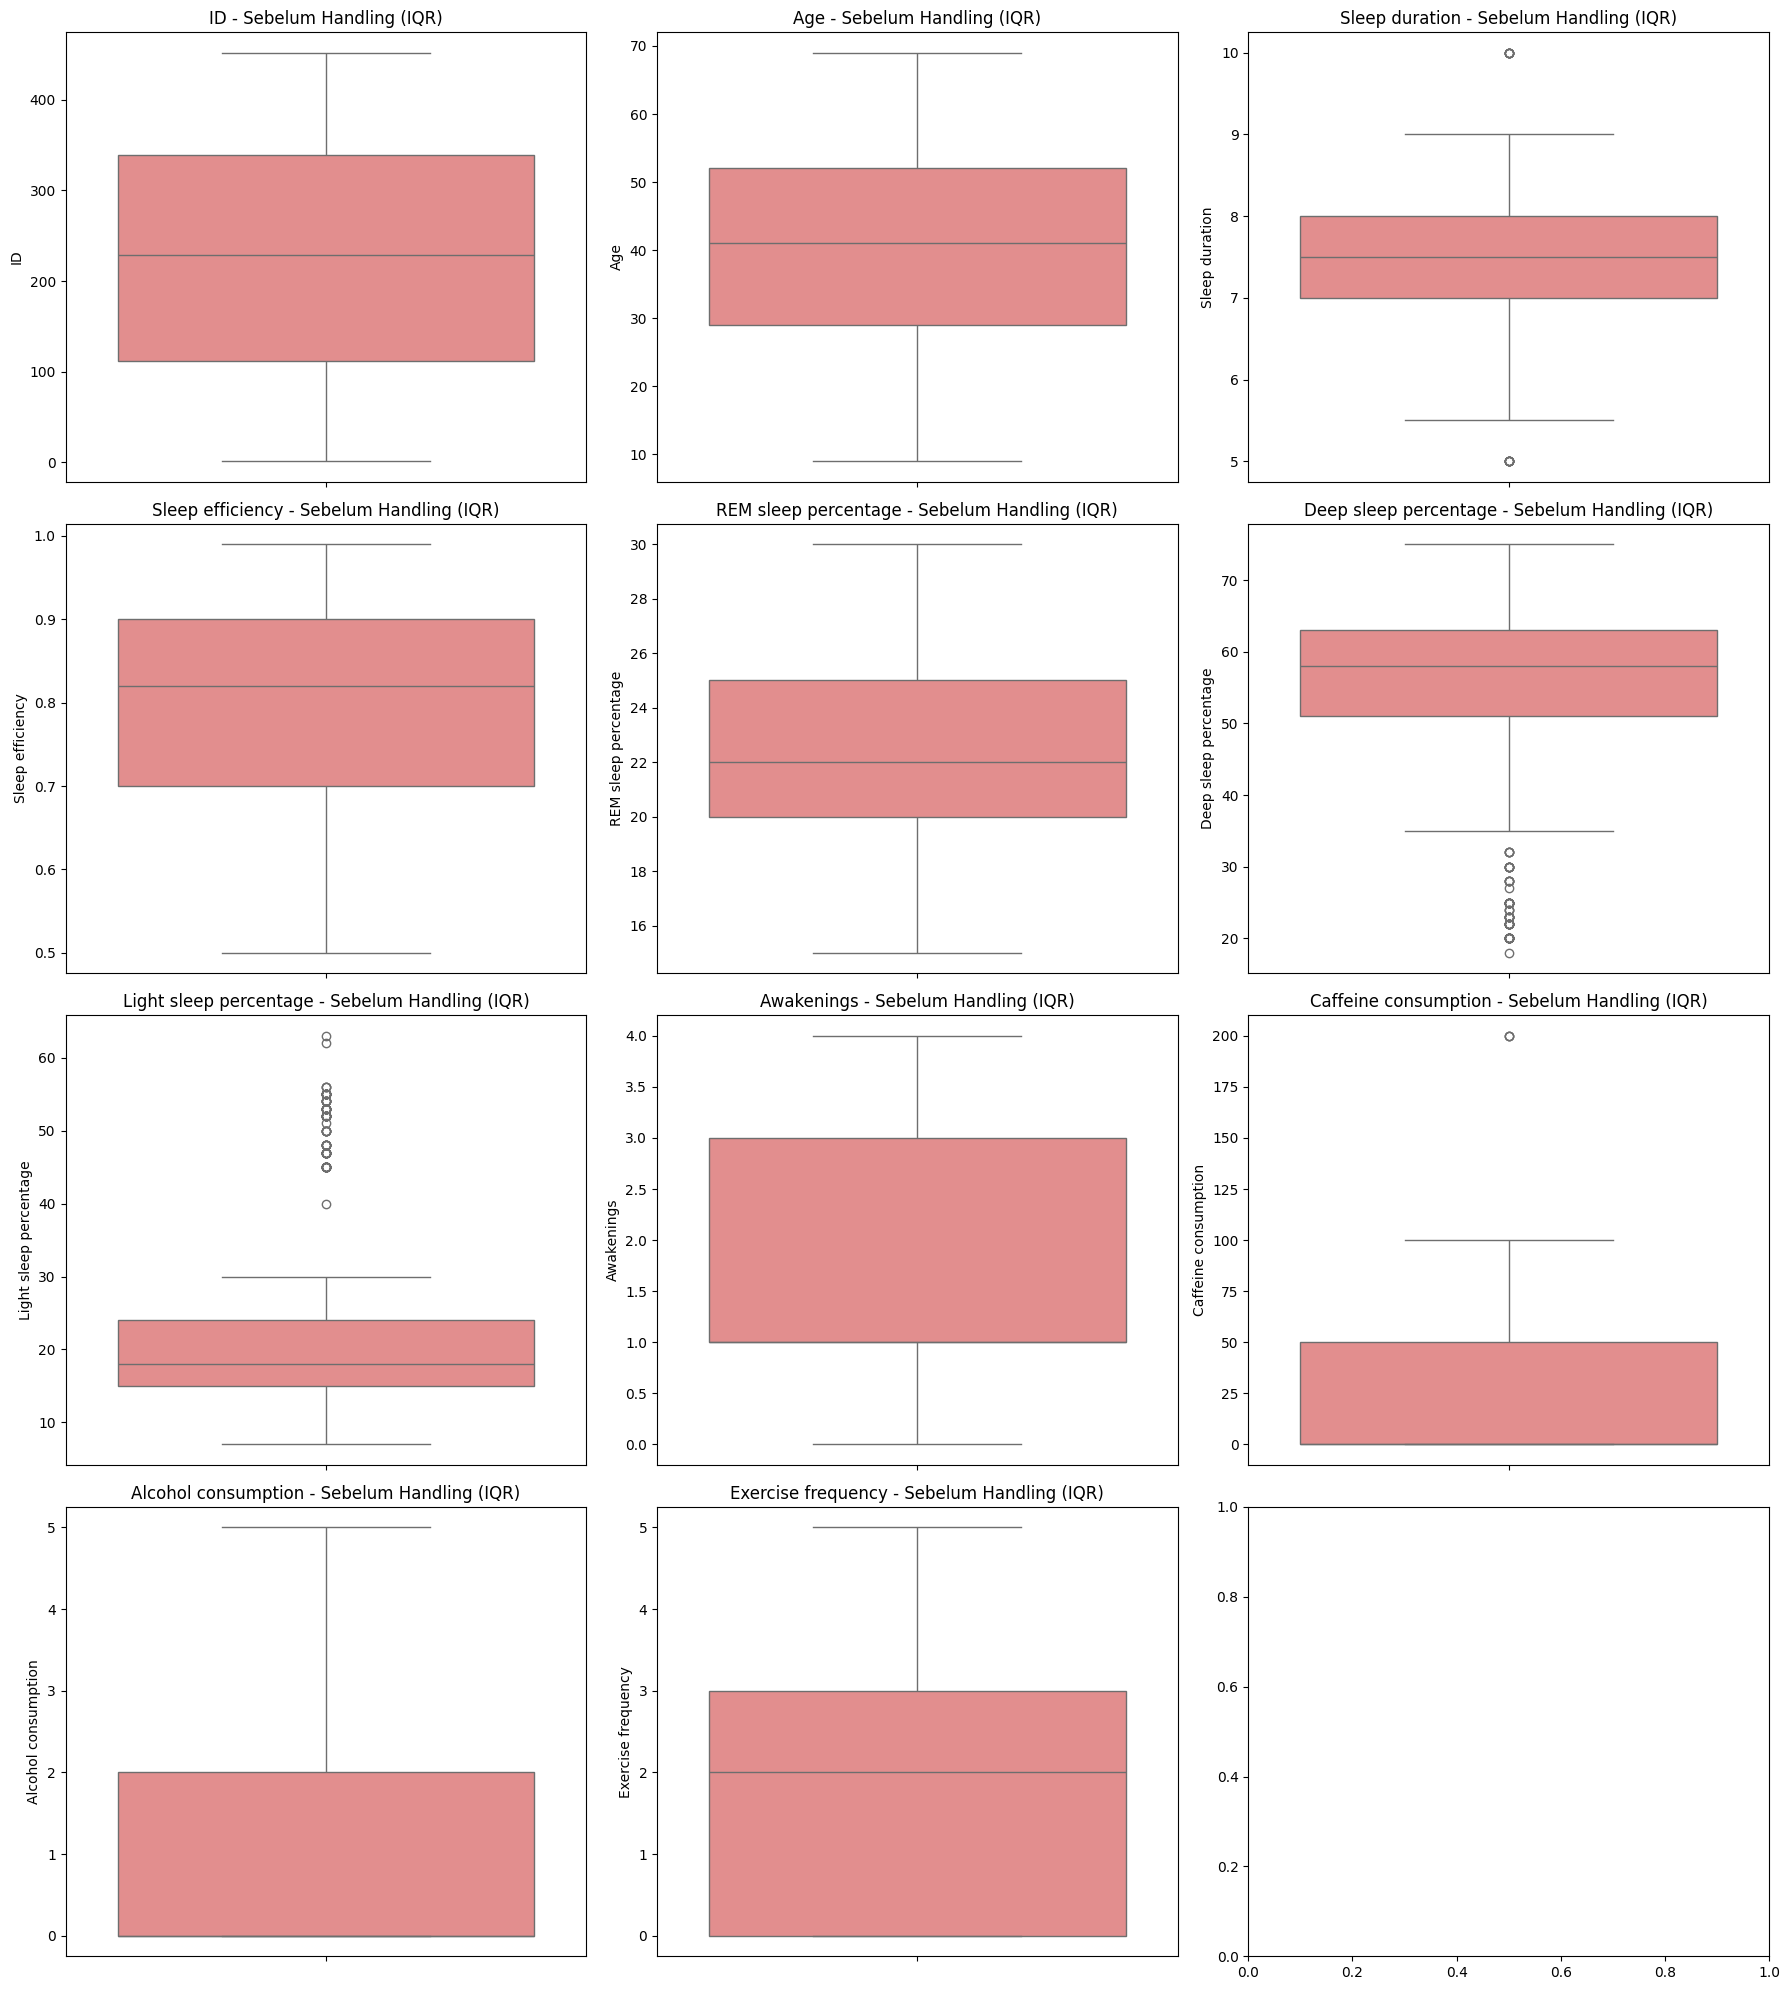

ID: nilai dibatasi ke [-229.5 , 680.5]
Age: nilai dibatasi ke [-5.5 , 86.5]
Sleep duration: nilai dibatasi ke [5.5 , 9.5]
Sleep efficiency: nilai dibatasi ke [0.4 , 1.2]
REM sleep percentage: nilai dibatasi ke [12.5 , 32.5]
Deep sleep percentage: nilai dibatasi ke [33.0 , 81.0]
Light sleep percentage: nilai dibatasi ke [1.5 , 37.5]
Awakenings: nilai dibatasi ke [-2.0 , 6.0]
Caffeine consumption: nilai dibatasi ke [-75.0 , 125.0]
Alcohol consumption: nilai dibatasi ke [-3.0 , 5.0]
Exercise frequency: nilai dibatasi ke [-4.5 , 7.5]


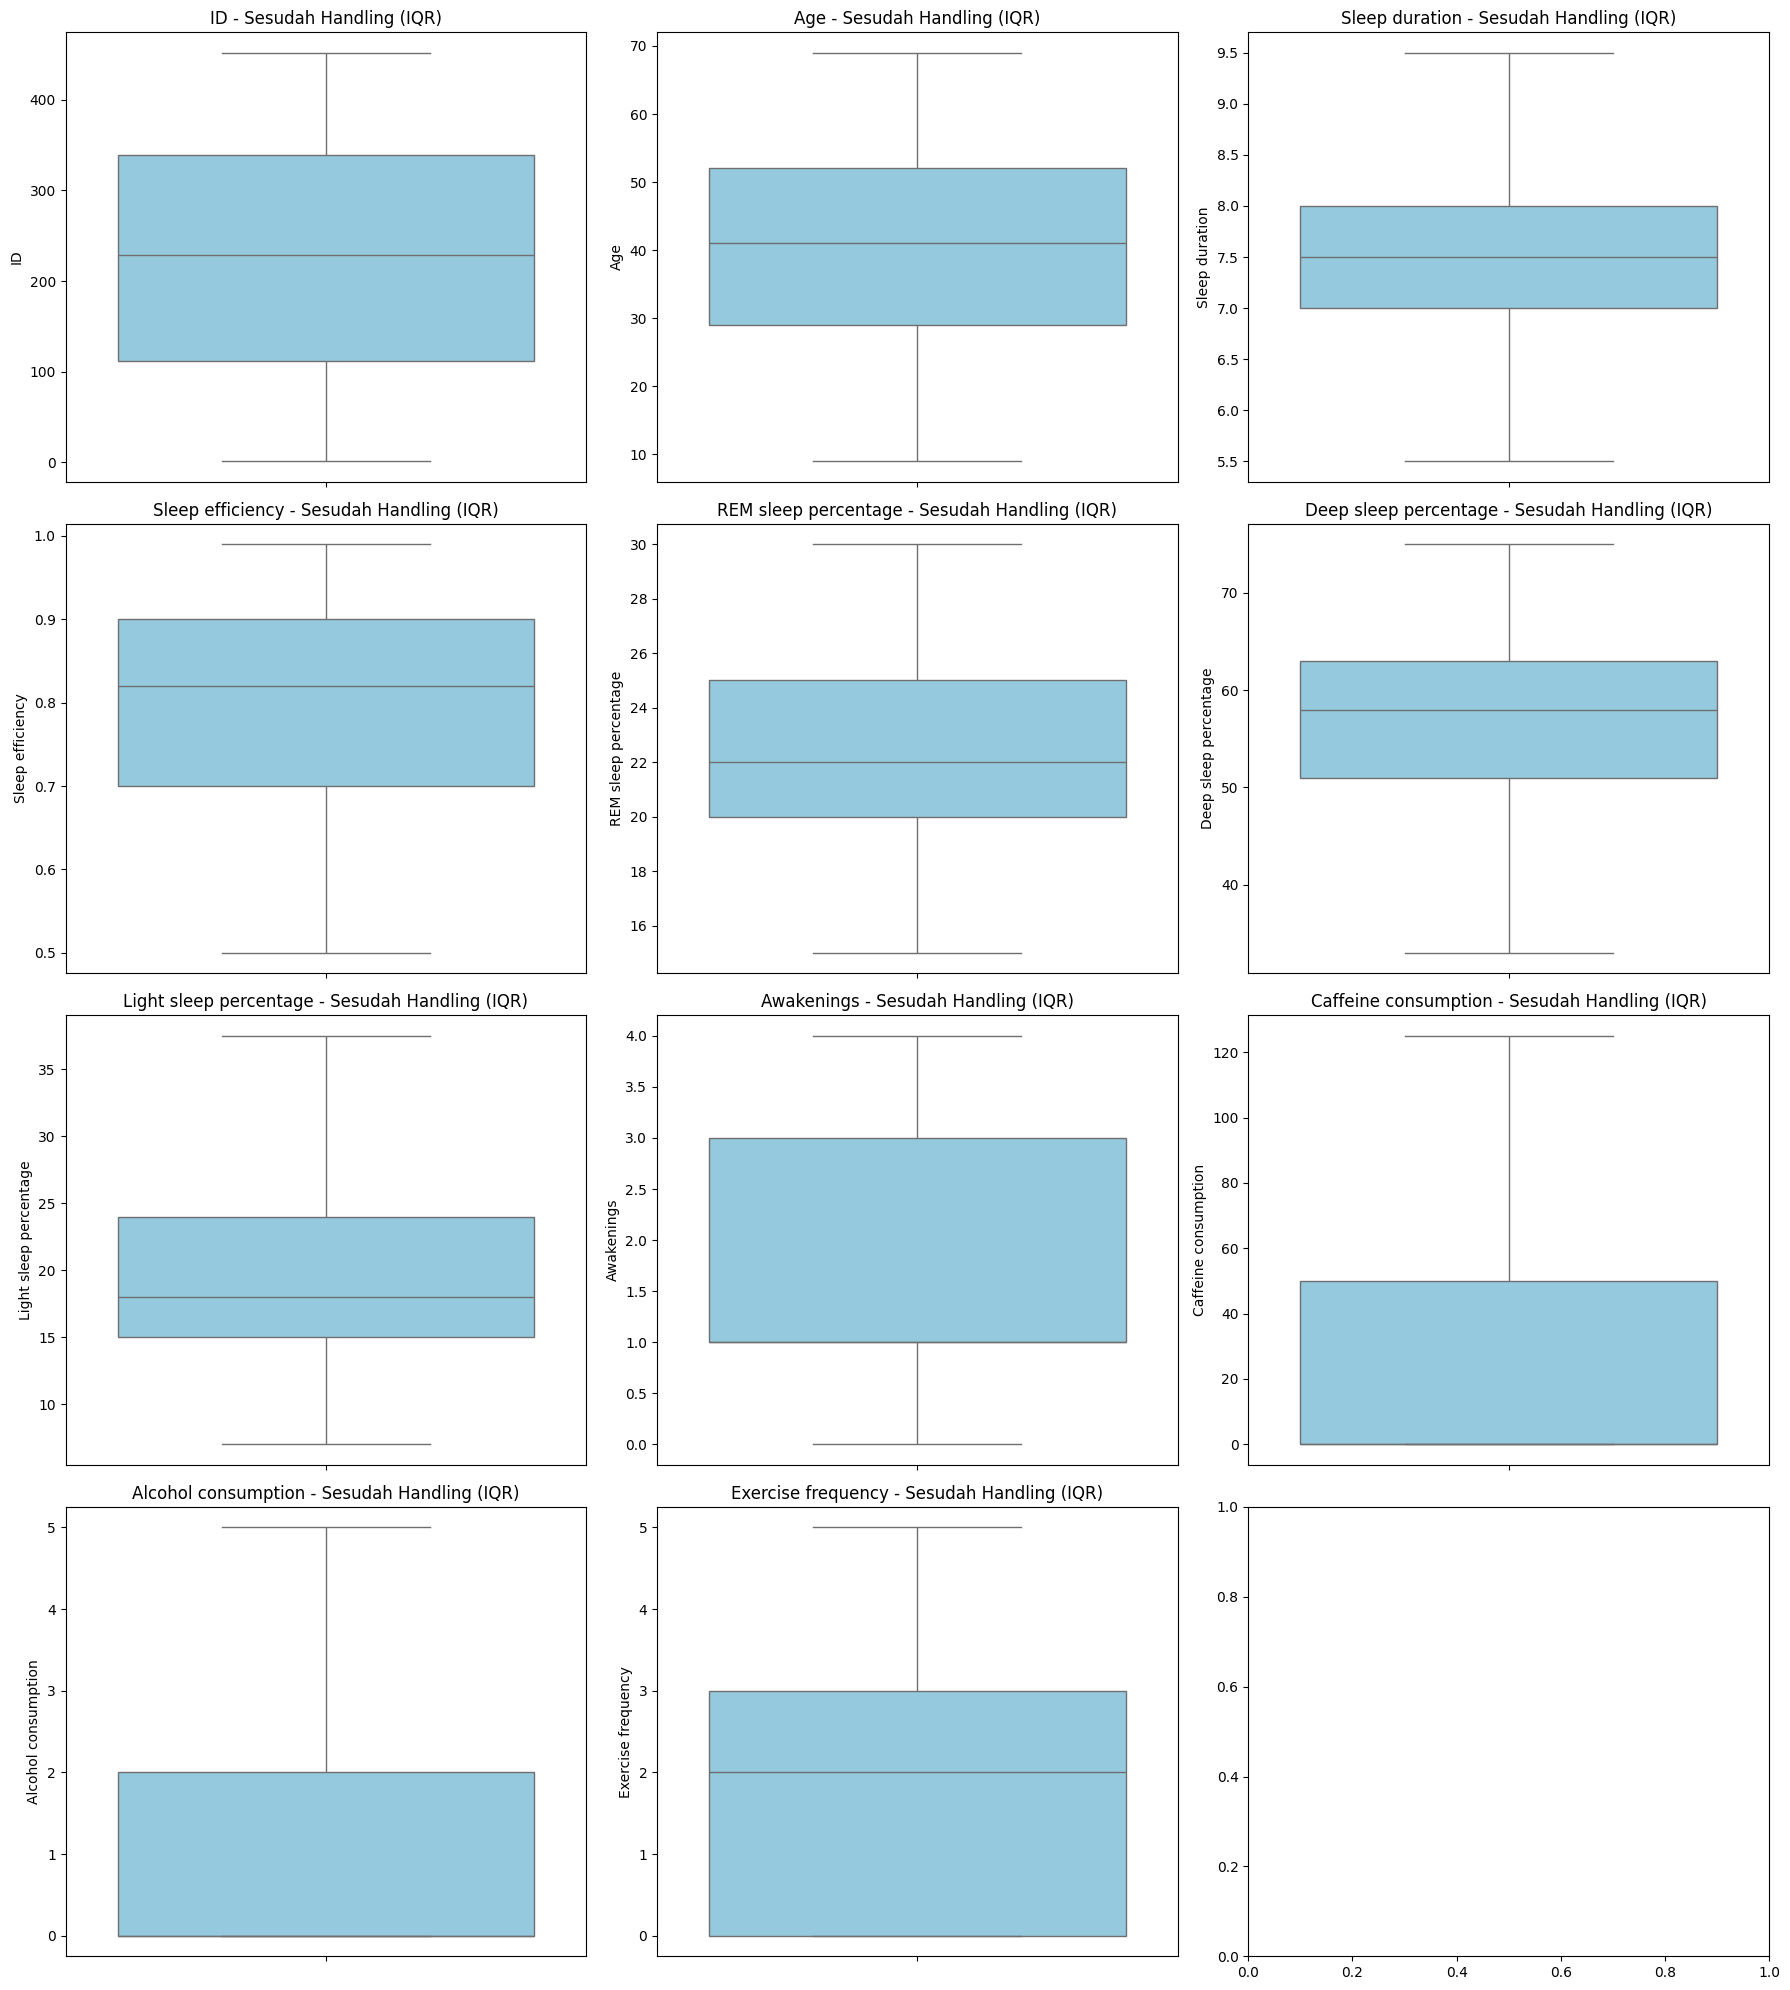


=== Jumlah Outlier Setelah Handling (IQR) ===
Kolom: ID, Jumlah outlier: 0
Kolom: Age, Jumlah outlier: 0
Kolom: Sleep duration, Jumlah outlier: 0
Kolom: Sleep efficiency, Jumlah outlier: 0
Kolom: REM sleep percentage, Jumlah outlier: 0
Kolom: Deep sleep percentage, Jumlah outlier: 0
Kolom: Light sleep percentage, Jumlah outlier: 0
Kolom: Awakenings, Jumlah outlier: 0
Kolom: Caffeine consumption, Jumlah outlier: 0
Kolom: Alcohol consumption, Jumlah outlier: 0
Kolom: Exercise frequency, Jumlah outlier: 0

✅ Data hasil handling outlier (IQR) telah disimpan sebagai 'Sleep_Efficiency_Clean.csv'


In [10]:
# Handling outlier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Copy dataset biar data asli tidak berubah
df_iqr = df.copy()
numerik_df = df.select_dtypes(include=['number'])

# ------------------------------------------
#  Visualisasi Boxplot Sebelum Handling
# ------------------------------------------
n_cols = len(numerik_df.columns)
n_rows = int(np.ceil(n_cols / 3))
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerik_df.columns):
    sns.boxplot(y=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f"{col} - Sebelum Handling (IQR)")
plt.tight_layout()
plt.show()

# ------------------------------------------
#  Handling Outlier dengan Metode IQR
# ------------------------------------------
for col in numerik_df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Batasi nilai di luar rentang IQR
    df_iqr[col] = np.where(df[col] < lower, lower,
                          np.where(df[col] > upper, upper, df[col]))
    print(f"{col}: nilai dibatasi ke [{round(lower,2)} , {round(upper,2)}]")

# ------------------------------------------
#  Visualisasi Boxplot Sesudah Handling
# ------------------------------------------
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numerik_df.columns):
    sns.boxplot(y=df_iqr[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"{col} - Sesudah Handling (IQR)")
plt.tight_layout()
plt.show()

# ------------------------------------------
#  Deteksi Outlier Setelah Handling
# ------------------------------------------
print("\n=== Jumlah Outlier Setelah Handling (IQR) ===")
for col in numerik_df.columns:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_iqr[(df_iqr[col] < lower) | (df_iqr[col] > upper)]
    print(f"Kolom: {col}, Jumlah outlier: {len(outliers)}")

df_iqr.to_csv('Sleep_Efficiency_Clean.csv', index=False)
print("\n✅ Data hasil handling outlier (IQR) telah disimpan sebagai 'Sleep_Efficiency_Clean.csv'")

Menggunakan Interquartile Range (IQR) untuk mendeteksi dan menangani outlier.
Nilai yang berada di luar batas bawah/atas digantikan dengan batas minimum/maksimum IQR.

------------------------------------------------------------ STANDARISASI ------------------------------------------------------------

In [11]:
scaler = StandardScaler()

# Pilih hanya kolom numerik untuk di-standardisasi
numeric_columns = df.select_dtypes(include='number').columns
x1 = scaler.fit_transform(df[numeric_columns])
x1 = pd.DataFrame(x1, columns=numeric_columns)

x1.head()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
0,-1.740658,1.805639,-1.644520,0.669567,-1.366110,1.104582,-0.817365,-1.195204,-0.783159,-0.712049,0.859132
1,-1.732930,2.104460,-0.511174,-0.953672,-1.074232,-1.596133,1.864145,1.020111,-0.783159,1.150480,0.859132
2,-1.725203,-0.061998,0.622172,0.743351,-0.782354,1.104582,-0.948170,-0.456766,-0.783159,-0.712049,0.859132
3,-1.717476,-0.061998,-1.644520,-2.060427,0.093281,-1.789041,1.798742,1.020111,0.943350,2.392165,-0.524035
4,-1.709749,1.207995,0.622172,-0.215836,1.260793,0.140041,-0.424949,1.020111,-0.783159,1.150480,0.859132


Membuat semua kolom numerik berada pada skala yang sama.  
Menggunakan StandardScaler untuk mengubah kolom numerik menjadi rata-rata 0 dan standar deviasi 1.

Kolom dengan skala berbeda (misal umur vs konsumsi kafein) bisa mendominasi model jika tidak dinormalisasi. Standarisasi membuat model lebih stabi

--------------------------------------------------------------- ENCODING ---------------------------------------------------------------

In [12]:
kategori_df = df.select_dtypes(include='object').copy()
df_iap = df.copy()

for col in kategori_df.columns:
    le = LabelEncoder()
    df_iap[col] = le.fit_transform(df_iap[col])

print("\n--- Label Encoding ---")
display(df_iap.head())

# ===== ONE-HOT ENCODING (SOLUSI: DROP TIMESTAMP) =====
scaler = StandardScaler()
df_processed = df.copy()

# Drop kolom Bedtime dan Wakeup time (terlalu banyak unique values)
df_processed = df_processed.drop(columns=['Bedtime', 'Wakeup time'])

# Standardisasi kolom numerik
numeric_cols = df_processed.select_dtypes(include='number').columns
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

# One-Hot Encode kolom kategorical (hanya Gender dan Smoking status)
categorical_cols = df_processed.select_dtypes(include='object').columns
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print("\n--- One-Hot Encoding (Drop Bedtime & Wakeup time) ---")
display(df_processed.head())
print(f"\nShape: {df_processed.shape}")

# Simpan hasil
df_processed.to_csv('sleep_efficiency_encoded.csv', index=False)
print("\n✓ Data berhasil disimpan")


--- Label Encoding ---


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,0,57,57,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,1,340,348,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,3,40,0,129,131,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,4,40,0,300,308,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,5,57,1,66,66,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0



--- One-Hot Encoding (Drop Bedtime & Wakeup time) ---


,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Male,Smoking status_Yes
0,-1.740658,1.805639,-1.644520,0.669567,-1.366110,1.104582,-0.817365,-1.195204,-0.783159,-0.712049,0.859132,False,True
1,-1.732930,2.104460,-0.511174,-0.953672,-1.074232,-1.596133,1.864145,1.020111,-0.783159,1.150480,0.859132,True,True
2,-1.725203,-0.061998,0.622172,0.743351,-0.782354,1.104582,-0.948170,-0.456766,-0.783159,-0.712049,0.859132,False,False
3,-1.717476,-0.061998,-1.644520,-2.060427,0.093281,-1.789041,1.798742,1.020111,0.943350,2.392165,-0.524035,False,True
4,-1.709749,1.207995,0.622172,-0.215836,1.260793,0.140041,-0.424949,1.020111,-0.783159,1.150480,0.859132,True,False



Shape: (388, 13)

✓ Data berhasil disimpan


Mengubah kolom kategorikal menjadi format numerik dengan One-Hot Encoding, karena model ML tidak bisa langsung memproses data string, sehingga perlu diubah menjadi angka.

---------------------------------------------------------- FEATURE ENGINEERING ----------------------------------------------------------

In [13]:
# Load data asli dan encoded
df_original = pd.read_csv('sleep_efficiency.csv')
df_fe = pd.read_csv('sleep_efficiency_encoded.csv')

# Feature: Deep sleep ratio (gunakan data original)
if 'Deep sleep percentage' in df_original.columns and 'Sleep duration' in df_original.columns:
    df_fe['Deep_sleep_ratio'] = df_original['Deep sleep percentage'] / df_original['Sleep duration']

print("\n--- Hasil Feature Engineering ---")
display(df_fe.head())
print(f"Shape: {df_fe.shape}")

# Simpan hasil
df_fe.to_csv('sleep_efficiency_final.csv', index=False)
print("\n✓ Data dengan feature engineering berhasil disimpan")


--- Hasil Feature Engineering ---


,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Male,Smoking status_Yes,Deep_sleep_ratio
0,-1.740658,1.805639,-1.644520,0.669567,-1.366110,1.104582,-0.817365,-1.195204,-0.783159,-0.712049,0.859132,False,True,11.666667
1,-1.732930,2.104460,-0.511174,-0.953672,-1.074232,-1.596133,1.864145,1.020111,-0.783159,1.150480,0.859132,True,True,4.000000
2,-1.725203,-0.061998,0.622172,0.743351,-0.782354,1.104582,-0.948170,-0.456766,-0.783159,-0.712049,0.859132,False,False,8.750000
3,-1.717476,-0.061998,-1.644520,-2.060427,0.093281,-1.789041,1.798742,1.020111,0.943350,2.392165,-0.524035,False,True,4.166667
4,-1.709749,1.207995,0.622172,-0.215836,1.260793,0.140041,-0.424949,1.020111,-0.783159,1.150480,0.859132,True,False,6.875000


Shape: (388, 14)

✓ Data dengan feature engineering berhasil disimpan


Menambahkan informasi baru dari data yang ada untuk meningkatkan kualitas model.  Feature baru dapat memberikan insight tambahan bagi model untuk mengenali pola tidur secara lebih akurat.

------------------------------------------------------------ SPLITTING DATA ------------------------------------------------------------

In [14]:
# Ambil SEMUA kolom kecuali target dan ID
X = df_processed.drop(['Sleep efficiency', 'ID'], axis=1, errors='ignore')
y = df_processed['Sleep efficiency']

print(f"Jumlah fitur: {X.shape[1]}")
print(f"Fitur: {X.columns.tolist()}")

# Split menjadi train + temp dan test
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split temp menjadi train dan validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42  # 0.25 x 0.8 = 0.2 untuk validation
)

print("\nDistribusi Data:")
print(f"Training   : {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation : {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Testing    : {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

Jumlah fitur: 11
Fitur: ['Age', 'Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'Gender_Male', 'Smoking status_Yes']

Distribusi Data:
Training   : 232 samples (59.8%)
Validation : 78 samples (20.1%)
Testing    : 78 samples (20.1%)


Data dibagi menjadi 60% untuk training, 20% untuk validation, dan 20% untuk testing. Training digunakan untuk membangun model, validation untuk tuning dan mencegah overfitting, sedangkan testing untuk mengevaluasi performa akhir model.

--------------------------------------------------------------- Support Vector Regressor (SVR) ---------------------------------------------------------------

=== SUPPORT VECTOR REGRESSOR (SVR) ===

--- TRAINING SET ---
MAE  : 0.3421618790855142
MSE  : 0.1893865088162162
RMSE : 0.43518560272166196
R² Score: 0.7979385000857108

--- VALIDATION SET ---
MAE  : 0.3467118181770424
MSE  : 0.20004808583475284
RMSE : 0.4472673538665133
R² Score: 0.8238103384528823

--- TESTING SET ---
MAE  : 0.3872118987461325
MSE  : 0.25263753606567096
RMSE : 0.5026306159255234
R² Score: 0.752587413320955


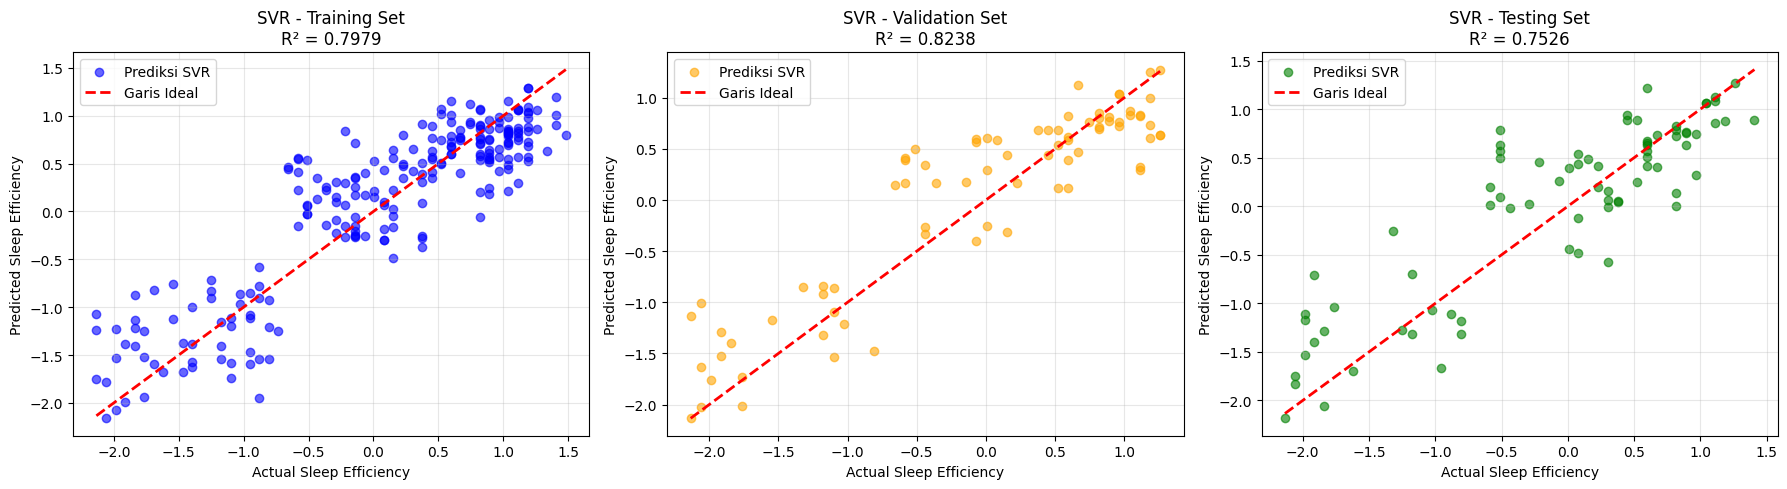


=== RINGKASAN PERFORMANCE SVR ===
Training R²   : 0.7979 (79.79%)
Validation R² : 0.8238 (82.38%)
Testing R²    : 0.7526 (75.26%)


In [15]:
# Gunakan semua fitur untuk SVR
X_train_svr = X_train
X_val_svr = X_val
X_test_svr = X_test

# Buat model Support Vector Regressor dengan kernel linear
svr = SVR(kernel='linear')
svr.fit(X_train_svr, y_train)

# Prediksi hasil untuk SEMUA set data (training, validation, testing)
y_pred_train_svr = svr.predict(X_train_svr)
y_pred_val_svr = svr.predict(X_val_svr)
y_pred_test_svr = svr.predict(X_test_svr)

# Evaluasi model SVR untuk semua set data
print("=== SUPPORT VECTOR REGRESSOR (SVR) ===")
print("\n--- TRAINING SET ---")
print("MAE  :", mean_absolute_error(y_train, y_pred_train_svr))
print("MSE  :", mean_squared_error(y_train, y_pred_train_svr))
print("RMSE :", np.sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print("R² Score:", r2_score(y_train, y_pred_train_svr))

print("\n--- VALIDATION SET ---")
print("MAE  :", mean_absolute_error(y_val, y_pred_val_svr))
print("MSE  :", mean_squared_error(y_val, y_pred_val_svr))
print("RMSE :", np.sqrt(mean_squared_error(y_val, y_pred_val_svr)))
print("R² Score:", r2_score(y_val, y_pred_val_svr))

print("\n--- TESTING SET ---")
print("MAE  :", mean_absolute_error(y_test, y_pred_test_svr))
print("MSE  :", mean_squared_error(y_test, y_pred_test_svr))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("R² Score:", r2_score(y_test, y_pred_test_svr))

# Visualisasi hasil untuk semua set data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training set
axes[0].scatter(y_train, y_pred_train_svr, color='blue', alpha=0.6, label='Prediksi SVR')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Garis Ideal')
axes[0].set_xlabel("Actual Sleep Efficiency")
axes[0].set_ylabel("Predicted Sleep Efficiency")
axes[0].set_title(f"SVR - Training Set\nR² = {r2_score(y_train, y_pred_train_svr):.4f}")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Validation set
axes[1].scatter(y_val, y_pred_val_svr, color='orange', alpha=0.6, label='Prediksi SVR')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Garis Ideal')
axes[1].set_xlabel("Actual Sleep Efficiency")
axes[1].set_ylabel("Predicted Sleep Efficiency")
axes[1].set_title(f"SVR - Validation Set\nR² = {r2_score(y_val, y_pred_val_svr):.4f}")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Testing set
axes[2].scatter(y_test, y_pred_test_svr, color='green', alpha=0.6, label='Prediksi SVR')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Garis Ideal')
axes[2].set_xlabel("Actual Sleep Efficiency")
axes[2].set_ylabel("Predicted Sleep Efficiency")
axes[2].set_title(f"SVR - Testing Set\nR² = {r2_score(y_test, y_pred_test_svr):.4f}")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ringkasan performa
print("\n=== RINGKASAN PERFORMANCE SVR ===")
r2_train_svr = r2_score(y_train, y_pred_train_svr)
r2_val_svr = r2_score(y_val, y_pred_val_svr)
r2_test_svr = r2_score(y_test, y_pred_test_svr)

print(f"Training R²   : {r2_train_svr:.4f} ({r2_train_svr*100:.2f}%)")
print(f"Validation R² : {r2_val_svr:.4f} ({r2_val_svr*100:.2f}%)")
print(f"Testing R²    : {r2_test_svr:.4f} ({r2_test_svr*100:.2f}%)")

### Support Vector Regressor (SVR)
SVR adalah variasi dari Support Vector Machine (SVM) yang digunakan untuk regresi. SVR berusaha menjaga error agar tetap berada dalam batas toleransi tertentu (disebut epsilon). Dalam model ini digunakan kernel RBF (Radial Basis Function) agar model dapat mengenali pola non-linear antara fitur dan target.

Hasil evaluasi menunjukkan bahwa SVR memiliki nilai R² lebih tinggi, yaitu sekitar 0.75–0.82, menandakan bahwa model ini lebih mampu menjelaskan variasi data Sleep Efficiency dibandingkan Linear Regression. Selain itu, nilai MAE, MSE, dan RMSE juga lebih kecil, sehingga prediksi SVR lebih akurat dan stabil.

**MAE (Mean Absolute Error):** Menunjukkan rata-rata besar kesalahan absolut antara nilai aktual dan prediksi. Nilai yang lebih kecil berarti prediksi model semakin mendekati data sebenarnya.

**MSE (Mean Squared Error):** Menghitung rata-rata kuadrat kesalahan, memberikan penalti lebih besar pada error yang ekstrem.

**RMSE (Root Mean Squared Error):** Akar dari MSE, menunjukkan kesalahan dalam satuan yang sama dengan target (Sleep Efficiency).

**R² (R-squared):** Mengukur seberapa besar variasi data target yang bisa dijelaskan oleh model (nilai mendekati 1 berarti model baik).

Artinya, model Support Vector Regressor dapat menjelaskan sekitar 75-82% variasi data Sleep Efficiency, dengan rata-rata error prediksi sekitar 0.34-0.38.

--------------------------------------------------------------- LINEAR REGRESSION ---------------------------------------------------------------

=== LINEAR REGRESSION ===
Koefisien : [-0.17154953 -0.96672072]
Intercept : 0.04364453650781258

--- TRAINING SET ---
MAE  : 0.4991955823844211
MSE  : 0.3347027921545839
RMSE : 0.5785350396947309
R² Score: 0.6428966950656151

--- VALIDATION SET ---
MAE  : 0.4806382033388988
MSE  : 0.3210316500297768
RMSE : 0.5665965496098408
R² Score: 0.7172556911572661

--- TESTING SET ---
MAE  : 0.49137655847207684
MSE  : 0.34279742928728474
RMSE : 0.5854890513812233
R² Score: 0.6642921712755785


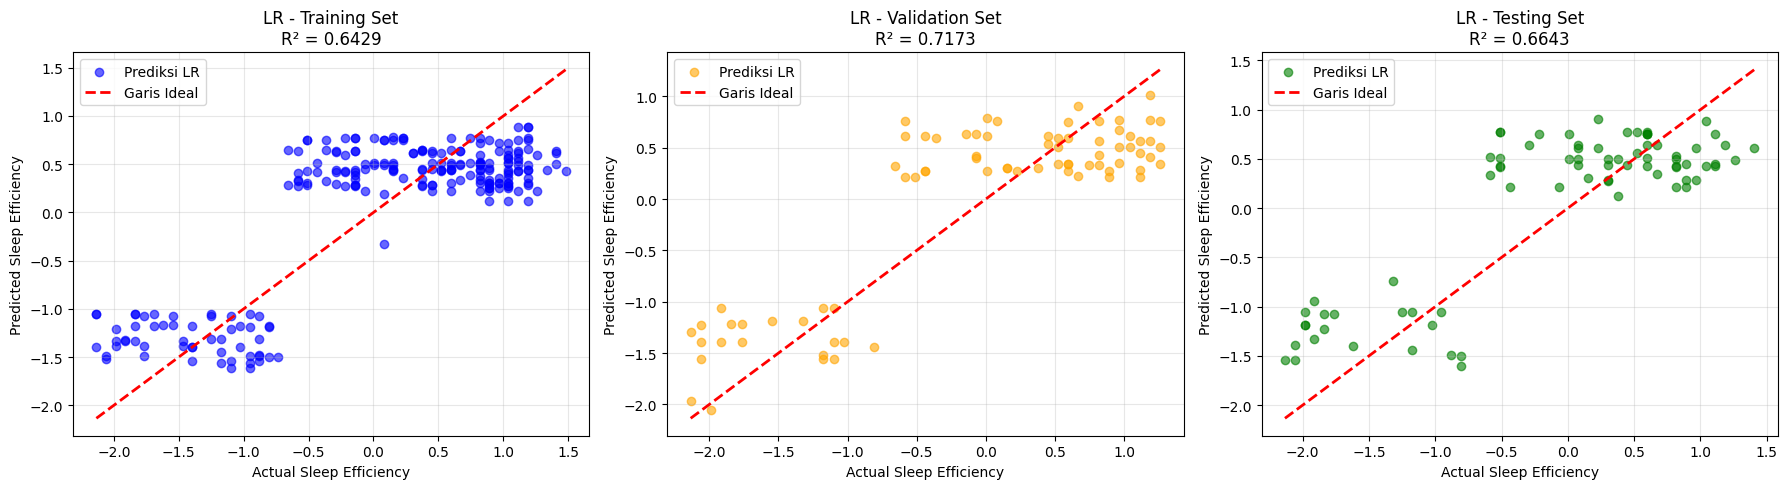


=== RINGKASAN PERFORMANCE LINEAR REGRESSION ===
Training R²   : 0.6429 (64.29%)
Validation R² : 0.7173 (71.73%)
Testing R²    : 0.6643 (66.43%)

=== INTERPRETASI MODEL ===
Setiap peningkatan 1% dalam Deep Sleep akan menurunkan sleep efficiency sebesar 0.1715
Setiap peningkatan 1% dalam Light Sleep akan menurunkan sleep efficiency sebesar 0.9667


In [16]:
# Gunakan dua fitur untuk Linear Regression
X_train_lr = X_train[['Deep sleep percentage', 'Light sleep percentage']]
X_val_lr = X_val[['Deep sleep percentage', 'Light sleep percentage']]
X_test_lr = X_test[['Deep sleep percentage', 'Light sleep percentage']]

# Buat dan latih model Linear Regression
reg = linear_model.LinearRegression()
reg.fit(X_train_lr, y_train)

# Prediksi hasil untuk SEMUA set data
y_pred_train_lr = reg.predict(X_train_lr)
y_pred_val_lr = reg.predict(X_val_lr)
y_pred_test_lr = reg.predict(X_test_lr)

# Evaluasi model Linear Regression untuk semua set data
print("=== LINEAR REGRESSION ===")
print("Koefisien :", reg.coef_)
print("Intercept :", reg.intercept_)

print("\n--- TRAINING SET ---")
print("MAE  :", mean_absolute_error(y_train, y_pred_train_lr))
print("MSE  :", mean_squared_error(y_train, y_pred_train_lr))
print("RMSE :", np.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print("R² Score:", r2_score(y_train, y_pred_train_lr))

print("\n--- VALIDATION SET ---")
print("MAE  :", mean_absolute_error(y_val, y_pred_val_lr))
print("MSE  :", mean_squared_error(y_val, y_pred_val_lr))
print("RMSE :", np.sqrt(mean_squared_error(y_val, y_pred_val_lr)))
print("R² Score:", r2_score(y_val, y_pred_val_lr))

print("\n--- TESTING SET ---")
print("MAE  :", mean_absolute_error(y_test, y_pred_test_lr))
print("MSE  :", mean_squared_error(y_test, y_pred_test_lr))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_test_lr)))
print("R² Score:", r2_score(y_test, y_pred_test_lr))

# Visualisasi hasil untuk semua set data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training set
axes[0].scatter(y_train, y_pred_train_lr, color='blue', alpha=0.6, label='Prediksi LR')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Garis Ideal')
axes[0].set_xlabel("Actual Sleep Efficiency")
axes[0].set_ylabel("Predicted Sleep Efficiency")
axes[0].set_title(f"LR - Training Set\nR² = {r2_score(y_train, y_pred_train_lr):.4f}")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Validation set
axes[1].scatter(y_val, y_pred_val_lr, color='orange', alpha=0.6, label='Prediksi LR')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Garis Ideal')
axes[1].set_xlabel("Actual Sleep Efficiency")
axes[1].set_ylabel("Predicted Sleep Efficiency")
axes[1].set_title(f"LR - Validation Set\nR² = {r2_score(y_val, y_pred_val_lr):.4f}")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Testing set
axes[2].scatter(y_test, y_pred_test_lr, color='green', alpha=0.6, label='Prediksi LR')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Garis Ideal')
axes[2].set_xlabel("Actual Sleep Efficiency")
axes[2].set_ylabel("Predicted Sleep Efficiency")
axes[2].set_title(f"LR - Testing Set\nR² = {r2_score(y_test, y_pred_test_lr):.4f}")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ringkasan performa
print("\n=== RINGKASAN PERFORMANCE LINEAR REGRESSION ===")
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_val_lr = r2_score(y_val, y_pred_val_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

print(f"Training R²   : {r2_train_lr:.4f} ({r2_train_lr*100:.2f}%)")
print(f"Validation R² : {r2_val_lr:.4f} ({r2_val_lr*100:.2f}%)")
print(f"Testing R²    : {r2_test_lr:.4f} ({r2_test_lr*100:.2f}%)")

# Interpretasi koefisien
print("\n=== INTERPRETASI MODEL ===")
print(f"Setiap peningkatan 1% dalam Deep Sleep akan {'meningkatkan' if reg.coef_[0] > 0 else 'menurunkan'} sleep efficiency sebesar {abs(reg.coef_[0]):.4f}")
print(f"Setiap peningkatan 1% dalam Light Sleep akan {'meningkatkan' if reg.coef_[1] > 0 else 'menurunkan'} sleep efficiency sebesar {abs(reg.coef_[1]):.4f}")

### Linear Regression
Linear Regression adalah metode supervised learning yang digunakan untuk memprediksi nilai numerik. Model ini mencari hubungan linear antara variabel independen (fitur X) dan variabel dependen (label Y).

**Pada dataset ini:**
- Digunakan **11 fitur** sebagai variabel X untuk memprediksi Sleep Efficiency
- Model dievaluasi menggunakan metrik MAE, MSE, RMSE, dan R² Score

**Hasil evaluasi menunjukkan:**
- Linear Regression memiliki nilai R² sekitar 0.66–0.71, yang berarti model dapat menjelaskan sekitar 66–71% variasi data Sleep Efficiency
- Namun, nilai error (MAE, MSE, RMSE) masih relatif tinggi, menandakan bahwa model linear belum sepenuhnya mampu menangkap hubungan non-linear pada data

### KESIMPULAN
Hasil evaluasi menunjukkan bahwa SVR memiliki nilai R² lebih tinggi, yaitu sekitar 0.75–0.82, menandakan bahwa model ini lebih mampu menjelaskan variasi data Sleep Efficiency dibandingkan Linear Regression.
Selain itu, nilai MAE, MSE, dan RMSE juga lebih kecil, sehingga prediksi SVR lebih akurat dan stabil.

Secara keseluruhan, SVR dengan kernel RBF memberikan hasil lebih baik daripada Linear Regression karena mampu mengenali hubungan non-linear dalam data, sementara Linear Regression hanya bekerja baik pada pola yang benar-benar linear.

--------------------------------------------------------------- DEEP LEARNING ---------------------------------------------------------------


=== Membangun Model Deep Learning ===
Jumlah fitur: 11

Training model...
Training selesai!

=== HASIL EVALUASI ===
Training R²   : 93.89%
Validation R² : 87.17%
Testing R²    : 82.75%


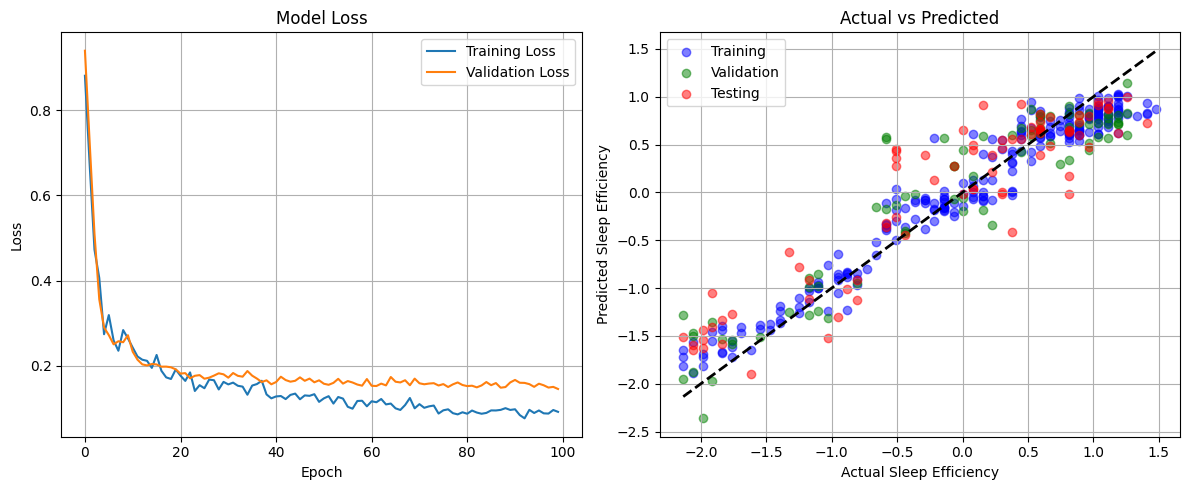

In [17]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

print("\n=== Membangun Model Deep Learning ===")

# Jumlah fitur
n_features = X_train.shape[1]
print(f"Jumlah fitur: {n_features}")

# ==================== MEMBUAT MODEL ====================
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(n_features,)),  # ← Cara yang benar
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


# ==================== TRAINING ====================
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=30, 
    restore_best_weights=True,
    verbose=0
)

print("\nTraining model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=0
)
print("Training selesai!")

# ==================== EVALUASI ====================
# Prediksi untuk semua set data
y_pred_train_dl = model.predict(X_train, verbose=0)
y_pred_val_dl = model.predict(X_val, verbose=0)
y_pred_test_dl = model.predict(X_test, verbose=0)

# Hitung R² Score
r2_train = r2_score(y_train, y_pred_train_dl)
r2_val = r2_score(y_val, y_pred_val_dl)
r2_test = r2_score(y_test, y_pred_test_dl)

print(f"\n=== HASIL EVALUASI ===")
print(f"Training R²   : {r2_train*100:.2f}%")
print(f"Validation R² : {r2_val*100:.2f}%")
print(f"Testing R²    : {r2_test*100:.2f}%")

# ==================== VISUALISASI ====================
plt.figure(figsize=(12, 5))

# Plot learning curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_pred_train_dl, alpha=0.5, color='blue', label='Training')
plt.scatter(y_val, y_pred_val_dl, alpha=0.5, color='green', label='Validation') 
plt.scatter(y_test, y_pred_test_dl, alpha=0.5, color='red', label='Testing')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Sleep Efficiency')
plt.ylabel('Predicted Sleep Efficiency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Deep Learning Model – Sleep Efficiency

Model deep learning ini dibuat dengan **Sequential Neural Network** yang strukturnya sederhana:
- **Input layer**: menyesuaikan jumlah fitur (ada 11 fitur)
- **Hidden layer**: 64, 32, dan 16 neuron dengan aktivasi **ReLU**
- **Dropout layer**: untuk mengurangi risiko overfitting
- **Output layer**: 1 neuron untuk memprediksi nilai *Sleep Efficiency*

Model ini menggunakan **Adam Optimizer (learning rate 0.001)** dan **MSE (Mean Squared Error)** sebagai fungsi loss.  
Proses training dilakukan sampai 100 epoch, dengan fitur **Early Stopping** agar pelatihan otomatis berhenti kalau hasil validasi tidak membaik lagi.

### Hasil Evaluasi
- **Training R²:** 93.98%  
- **Validation R²:** 87.17%  
- **Testing R²:** 82.75%  

Dari grafik *Model Loss*, terlihat bahwa nilai *validation loss* menurun dan stabil, artinya model belajar dengan baik tanpa overfitting.  
Grafik *Actual vs Predicted* juga menunjukkan bahwa hasil prediksi mendekati garis ideal, jadi model cukup akurat.

Secara keseluruhan, model ini bisa memprediksi **Sleep Efficiency** dengan hasil yang baik, karena nilai akurasinya sudah di atas 70% untuk data training dan validation.
